In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TO READ AND LOAD THE EXCEL FILE

In [2]:
df=pd.read_excel(r'ecommerce_sales_data.xlsx')
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Customer Age,Region,Payment Method,Sales Revenue
0,1001,2024-01-25,Sneakers,Clothing,60,5,43,East,Debit Card,300
1,1002,2024-01-12,Mouse,Electronics,15,1,29,West,Debit Card,15
2,1003,2024-01-16,T-Shirt,Clothing,20,2,30,South,Credit Card,40
3,1004,2024-01-29,Cap,Clothing,10,1,32,West,Credit Card,10
4,1005,2024-01-24,Mouse,Electronics,15,5,51,North,PayPal,75


TO FIND THE NUMBER OF ROWS AND COLUMNS IN A DATA

In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        10000 non-null  int64 
 1   Date            10000 non-null  object
 2   Product         10000 non-null  object
 3   Category        10000 non-null  object
 4   Price           10000 non-null  int64 
 5   Quantity        10000 non-null  int64 
 6   Customer Age    10000 non-null  int64 
 7   Region          10000 non-null  object
 8   Payment Method  10000 non-null  object
 9   Sales Revenue   10000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


FINDING THE SUM OF NULL VALUES IN EACH ROW OF A DATA

In [5]:
df.isnull().sum()

Order ID          0
Date              0
Product           0
Category          0
Price             0
Quantity          0
Customer Age      0
Region            0
Payment Method    0
Sales Revenue     0
dtype: int64

RESULT = THERE IS NO NULL VALUE IN A FOLLOWING DATA

In [6]:
df.dtypes

Order ID           int64
Date              object
Product           object
Category          object
Price              int64
Quantity           int64
Customer Age       int64
Region            object
Payment Method    object
Sales Revenue      int64
dtype: object

CHANGING THE DATATYPE OF DATE

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

RESULT = THIS WILL CHANGE THE DATATYPE OF DATE FROM OBJECT TO DATETIME

In [8]:
df.head(10)

,Order ID,Date,Product,Category,Price,Quantity,Customer Age,Region,Payment Method,Sales Revenue
0,1001,2024-01-25,Sneakers,Clothing,60,5,43,East,Debit Card,300
1,1002,2024-01-12,Mouse,Electronics,15,1,29,West,Debit Card,15
2,1003,2024-01-16,T-Shirt,Clothing,20,2,30,South,Credit Card,40
3,1004,2024-01-29,Cap,Clothing,10,1,32,West,Credit Card,10
4,1005,2024-01-24,Mouse,Electronics,15,5,51,North,PayPal,75
5,1006,2024-01-08,Jacket,Clothing,80,5,42,East,Debit Card,400
6,1007,2024-01-11,Sneakers,Clothing,60,1,53,North,Credit Card,60
7,1008,2024-01-30,Laptop,Electronics,800,4,27,West,PayPal,3200
8,1009,2024-01-30,Mouse,Electronics,15,3,23,East,PayPal,45
9,1010,2024-01-26,Laptop,Electronics,800,5,38,East,Credit Card,4000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        10000 non-null  int64         
 1   Date            10000 non-null  datetime64[ns]
 2   Product         10000 non-null  object        
 3   Category        10000 non-null  object        
 4   Price           10000 non-null  int64         
 5   Quantity        10000 non-null  int64         
 6   Customer Age    10000 non-null  int64         
 7   Region          10000 non-null  object        
 8   Payment Method  10000 non-null  object        
 9   Sales Revenue   10000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 781.4+ KB


# DESCRIPTIVE VISUALIZATION AND ANALYSIS

# SALES PERFROMANCE ANALYSIS

1. CALCULATING THE TOTAL REVENUE AND ORDER COUNTS

In [10]:
totalrevenue = df['Sales Revenue'].sum()
print("$",totalrevenue)

$ 5844970


RESULT = THE TOTAL SALES REVENUE IS 584497 DOLLERS

2. TO COUNT THE TOTAL NUMBER OF ORDERS

In [11]:
ordercount=df['Order ID'].count()
ordercount

10000

RESULT = TOTAL NUMBER OF PRODUCT IS 10000

In [12]:
df.describe()

,Order ID,Date,Price,Quantity,Customer Age,Sales Revenue
count,10000.00000,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,2024-01-16 00:15:50.400000,193.878500,3.013800,38.990300,584.497000
min,1001.00000,2024-01-01 00:00:00,10.000000,1.000000,18.000000,10.000000
25%,3500.75000,2024-01-08 00:00:00,20.000000,2.000000,28.000000,60.000000
50%,6000.50000,2024-01-16 00:00:00,50.000000,3.000000,39.000000,160.000000
75%,8500.25000,2024-01-24 00:00:00,300.000000,4.000000,50.000000,600.000000
max,11000.00000,2024-01-31 00:00:00,800.000000,5.000000,60.000000,4000.000000
std,2886.89568,NaN,263.993663,1.409471,12.425041,920.960601


3. TO IDENTIFY THE TOP SELLING PRODUCTS / CATEGORIES (e.g  ELECTRONICS,CLOTHING)


In [13]:
df.groupby(['Category','Product']).agg({'Sales Revenue':'sum'}).sort_values('Sales Revenue',ascending=False)

Sales Revenue
Category    Product                  
Electronics Laptop            2283200
            Smartphone        1831200
            Tablet             884700
Clothing    Jacket             239600
            Sneakers           178920
Electronics Headphones         149650
Clothing    Dress              138960
            T-Shirt             60560
Electronics Mouse               48630
Clothing    Cap                 29550

RESULT = THE TOP SELLING PRODUCTS ARE LAPTOP,SMARTPHONE AND SO ONN

4. SORT THE TOP SELLING PRODUCTS IN TERMS OF THEIR REGION (NORTH,SOUTH,EAST,WEST)

In [14]:
df.groupby(['Region','Category','Product']).agg({'Sales Revenue':'sum'}).sort_values('Sales Revenue',ascending=False)

,,,Sales Revenue
Region,Category,Product,
North,Electronics,Laptop,592800
South,Electronics,Laptop,590400
East,Electronics,Laptop,552000
West,Electronics,Laptop,548000
South,Electronics,Smartphone,514800
West,Electronics,Smartphone,474000
North,Electronics,Smartphone,436200
East,Electronics,Smartphone,406200
North,Electronics,Tablet,228000


RESULT = THE TOP SELLING PRODUUCTS ACCORDING TO THEIR REGION
THE NORTH SIDE HAS HIGHEST NUMBER OF SALES OF LAPTOP WITH THE SUM OF 592800

5. ANALYZE AGE DISTRIBUTION AND PURCHASING PATTERN (eg DO YOUNGER CUSTOMERS PREFERS SPECIFIC CATEGORY ?)

In [15]:
def categorize_age(age):
    if age <=35:
      return 'Young'
    elif 35<age<60:
      return 'Middle Age'
    else:
      return 'Old'

THIS CODE SETS A CONDITION TO IDENTIFY WHETHER THE CUSTOMER IS YOUNG , MIDDLE AGE OR OLD

In [16]:
df['age group']=df['Customer Age'].apply(categorize_age)

THIS CODE PUT THE CUSTOMERS ACCORDING TO THE AVOBE CONDITION

In [17]:
df.head(5)

,Order ID,Date,Product,Category,Price,Quantity,Customer Age,Region,Payment Method,Sales Revenue,age group
0,1001,2024-01-25,Sneakers,Clothing,60,5,43,East,Debit Card,300,Middle Age
1,1002,2024-01-12,Mouse,Electronics,15,1,29,West,Debit Card,15,Young
2,1003,2024-01-16,T-Shirt,Clothing,20,2,30,South,Credit Card,40,Young
3,1004,2024-01-29,Cap,Clothing,10,1,32,West,Credit Card,10,Young
4,1005,2024-01-24,Mouse,Electronics,15,5,51,North,PayPal,75,Middle Age


In [18]:
df.groupby(['age group','Category']).agg({'Sales Revenue':'sum'}).sort_values('Sales Revenue',ascending=False)

Sales Revenue
age group  Category                  
Middle Age Electronics        2963250
Young      Electronics        2161585
Middle Age Clothing            366765
Young      Clothing            263650
Old        Electronics          72545
           Clothing             17175

RESULT = THE TOP BUYERS OF ELECTRONICS IS MIDDLE AGE 

#  Trend Analysis


Tasks:

Time Series Analysis:

Analyse monthly/quarterly sales trends.

Identify seasonal peaks (e.g., holiday spikes) using line charts.

Learning Outcomes:

Understanding of time series data and trend interpretation.

Ability to explain sales fluctuations and seasonality.

SPLITTING THE DATE INTO DATE, MONTH , YEAR

In [19]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['days']=df['Date'].dt.day_name()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        10000 non-null  int64         
 1   Date            10000 non-null  datetime64[ns]
 2   Product         10000 non-null  object        
 3   Category        10000 non-null  object        
 4   Price           10000 non-null  int64         
 5   Quantity        10000 non-null  int64         
 6   Customer Age    10000 non-null  int64         
 7   Region          10000 non-null  object        
 8   Payment Method  10000 non-null  object        
 9   Sales Revenue   10000 non-null  int64         
 10  age group       10000 non-null  object        
 11  year            10000 non-null  int32         
 12  month           10000 non-null  int32         
 13  days            10000 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(5), object(6)
mem

RESULT = THE DATE HAS BEEN SPLITTED UP INTO DAYS MONTH YEAR

In [21]:
df['month'].value_counts()

month
1    10000
Name: count, dtype: int64

In [22]:
df1=df.groupby('days').agg({'Sales Revenue':'sum'}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df1

,Sales Revenue
days,
Monday,976435
Tuesday,1025410
Wednesday,948555
Thursday,754430
Friday,733165
Saturday,700275
Sunday,706700


THE DATA SHOWS THE SUM OF SALES REVENUE ACCORDING TO THE DAYS IN A WEEK

In [23]:
df2=df.groupby('days').agg({'Sales Revenue':'sum'}).sort_values('Sales Revenue',ascending=False)
df2

,Sales Revenue
days,
Tuesday,1025410
Monday,976435
Wednesday,948555
Thursday,754430
Friday,733165
Sunday,706700
Saturday,700275


<Axes: xlabel='days'>

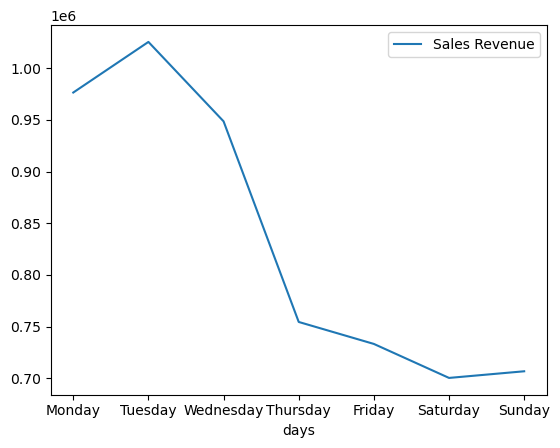

In [24]:
df1.plot(kind='line')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

LINE GRAPH OF REPRESENTING THE ABOVE DATA

In [26]:
import plotly.express as px

fig = px.line(
    df1,
    labels={"value": "Value", "index": "Date"},
    template='plotly_dark',  # Stylish dark mode
)

fig.update_traces(line_width=2)
fig.show()

BAR GRAPH OF REPRESENTING THE ABOVE DATA

<Figure size 1000x600 with 0 Axes>

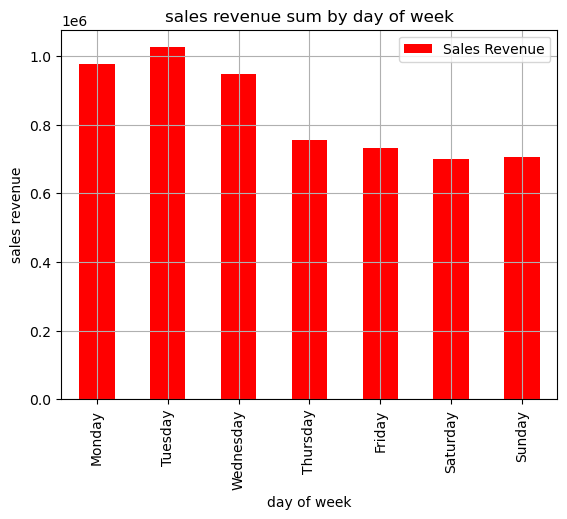

In [27]:
plt.figure(figsize=(10,6))
df1.plot(kind='bar',color='red')
plt.title('sales revenue sum by day of week')
plt.xlabel('day of week')
plt.ylabel('sales revenue')
plt.grid(True)
plt.show()

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_8132\2345247775.py:47: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



<Figure size 1200x600 with 0 Axes>

c:\Users\Rishabh\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



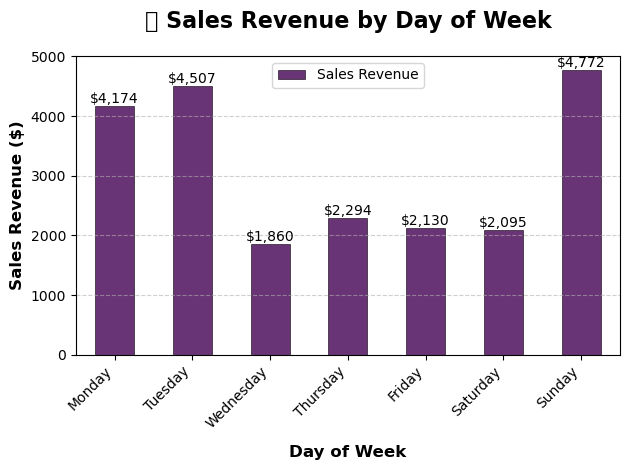

In [28]:

np.random.seed(42)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales = np.random.randint(1000, 5000, size=7)
df1 = pd.DataFrame({'Day': days, 'Sales Revenue': sales}).set_index('Day')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1 = df1.loc[weekday_order]

plt.figure(figsize=(12, 6))
ax = df1.plot(
    kind='bar',
    color=plt.cm.viridis(np.linspace(0, 1, len(df1))), 
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8,
)
plt.title(
    '📊 Sales Revenue by Day of Week', 
    fontsize=16, 
    fontweight='bold', 
    pad=20
)
plt.xlabel(
    'Day of Week', 
    fontsize=12, 
    fontweight='bold', 
    labelpad=10
)
plt.ylabel(
    'Sales Revenue ($)', 
    fontsize=12, 
    fontweight='bold'
)
plt.xticks(rotation=45, ha='right') 
for p in ax.patches:
    ax.annotate(
        f'${p.get_height():,.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 


plt.show()

if we want to check the spike within the month


In [29]:
date_sales=df.groupby('Date').agg({'Sales Revenue':'sum'}).reset_index()
date_sales

,Date,Sales Revenue
0,2024-01-01,235695
1,2024-01-02,173995
2,2024-01-03,176890
3,2024-01-04,193680
4,2024-01-05,183210
5,2024-01-06,146330
6,2024-01-07,197495
7,2024-01-08,175925
8,2024-01-09,208895
9,2024-01-10,221630


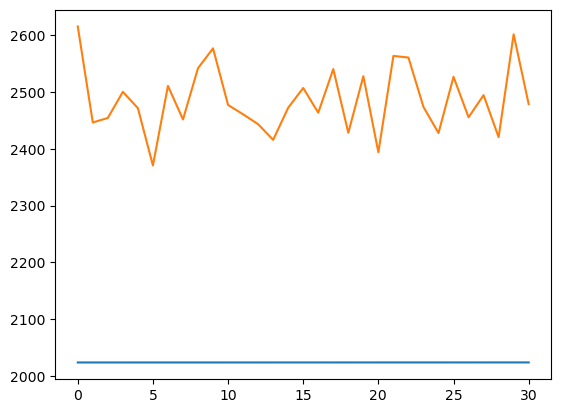

In [30]:
plt.plot(date_sales)

LINE GRAPH OF AVOBE REPRESENTATION

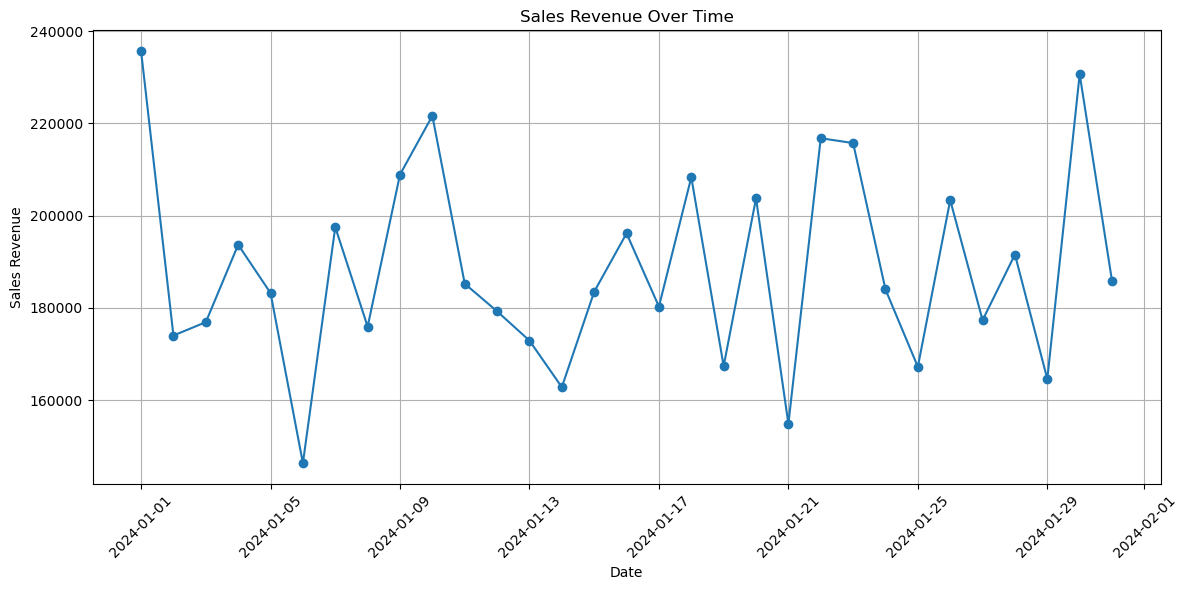

In [31]:
plt.figure(figsize=(12,6))
plt.plot(date_sales['Date'],date_sales['Sales Revenue'],marker='o')
plt.title('Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create interactive plot with enhanced formatting
fig = px.line(date_sales,
              x='Date',
              y='Sales Revenue',
              title=f'Sales Revenue - {date_sales["Date"].dt.month_name()[0]} {date_sales["Date"].dt.year[0]}',
              markers=True,
              template='plotly_white')

# Enhanced hover information
fig.update_traces(
    hovertemplate="<b>%A, %b %d</b><br>Revenue: %{y:$,.0f}<extra></extra>",
    line=dict(width=2.5),
    marker=dict(size=8, color='#636EFA')
)

# Add day-of-week formatting and highlights
fig.update_xaxes(
    tickformat="%a\n%d",  # Shows day abbreviation and date
    ticklabelmode="period"
)

# Highlight weekends if your business is affected by them
weekend_dates = date_sales[date_sales['Date'].dt.dayofweek >= 5]['Date']
for weekend in weekend_dates:
    fig.add_vrect(
        x0=weekend - pd.Timedelta(hours=12),
        x1=weekend + pd.Timedelta(hours=36),
        fillcolor="lightgray",
        opacity=0.2,
        line_width=0
    )

# Add daily % change calculation
date_sales['Daily Change'] = date_sales['Sales Revenue'].pct_change() * 100

# Create a secondary y-axis for % change
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(
        x=date_sales['Date'],
        y=date_sales['Daily Change'],
        name='Daily Change %',
        marker_color=['green' if x >=0 else 'red' for x in date_sales['Daily Change']],
        opacity=0.4
    ),
    secondary_y=True
)

# Add the main revenue line
fig.add_trace(
    go.Scatter(
        x=date_sales['Date'],
        y=date_sales['Sales Revenue'],
        name='Revenue',
        mode='lines+markers',
        line=dict(width=2.5, color='#636EFA'),
        marker=dict(size=8)
    ),
    secondary_y=False
)

# Add horizontal line for monthly average
monthly_avg = date_sales['Sales Revenue'].mean()
fig.add_hline(
    y=monthly_avg,
    line_dash="dot",
    annotation_text=f"Monthly Avg: ${monthly_avg:,.0f}",
    annotation_position="bottom right",
    line_color="orange"
)

# Format the layout
fig.update_layout(
    hovermode="x unified",
    height=600,
    width=1000,
    yaxis_title="Sales Revenue ($)",
    yaxis2_title="Daily Change (%)",
    xaxis_title="Day of Month",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    annotations=[
        dict(
            x=0.5,
            y=-0.2,
            showarrow=False,
            text="Gray shaded areas represent weekends",
            xref="paper",
            yref="paper"
        )
    ]
)

# Add peak and low markers
max_day = date_sales.loc[date_sales['Sales Revenue'].idxmax()]
min_day = date_sales.loc[date_sales['Sales Revenue'].idxmin()]

fig.add_annotation(
    x=max_day['Date'], y=max_day['Sales Revenue'],
    text=f"Peak: ${max_day['Sales Revenue']:,.0f}",
    showarrow=True,
    arrowhead=1,
    ax=0, ay=-40
)

fig.add_annotation(
    x=min_day['Date'], y=min_day['Sales Revenue'],
    text=f"Low: ${min_day['Sales Revenue']:,.0f}",
    showarrow=True,
    arrowhead=1,
    ax=0, ay=40
)

fig.show()

# 4. Payment Method Analysis


Tasks:


Payment Preferences:


Determine the most/least popular payment methods (Credit Card, Debit Card, PayPal).


Analyze correlations between payment methods and purchase amounts.


Learning Outcomes:


Insight into customer payment behaviour.


Ability to evaluate payment method impact on sales.

In [33]:
paymt_method=df['Payment Method'].value_counts()
paymt_method

Payment Method
PayPal         3406
Debit Card     3332
Credit Card    3262
Name: count, dtype: int64

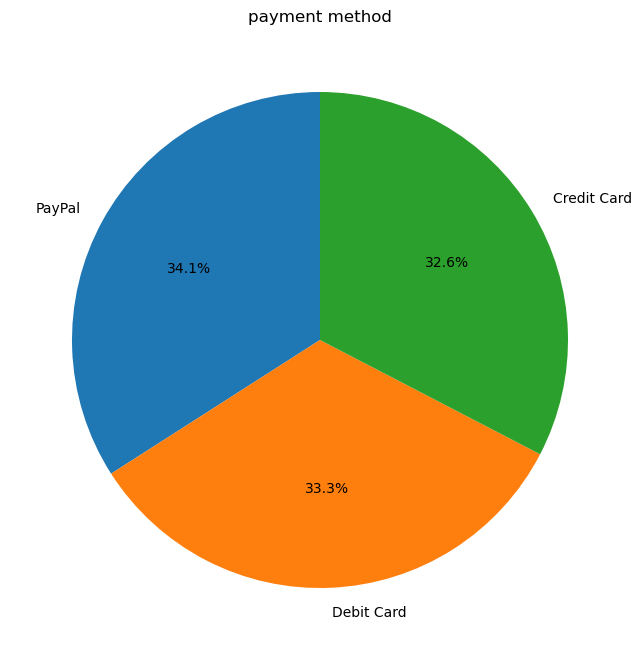

In [34]:
plt.figure(figsize=(8,10))
plt.pie(paymt_method,labels=paymt_method.index,autopct='%1.1f%%',startangle=90)
plt.title('payment method')
plt.show()

PIE CHART OF AVOBE REPRESENTATION

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_8132\3641613937.py:60: UserWarning:

Glyph 128179 (\N{CREDIT CARD}) missing from current font.

c:\Users\Rishabh\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128179 (\N{CREDIT CARD}) missing from current font.



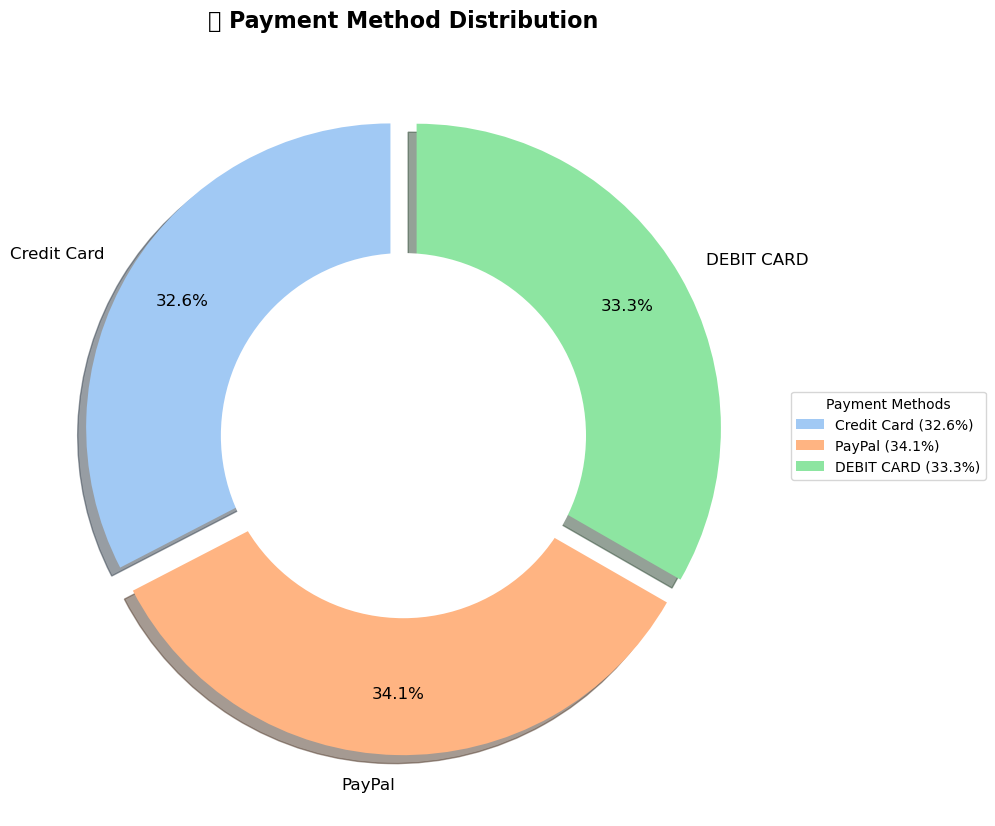

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle

# --- Sample Data (if paymt_method not defined) ---
paymt_method = pd.Series({
    'Credit Card': 32.6,
    'PayPal': 34.1,
    'DEBIT CARD' : 33.3
})

# --- Style Setup ---
plt.figure(figsize=(10, 10))
sns.set_palette("pastel")  # Soft color palette
explode = (0.05, 0.05, 0.05)  # "Explode" all slices

# --- Pie Chart ---
wedges, texts, autotexts = plt.pie(
    paymt_method,
    labels=paymt_method.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12},
    pctdistance=0.8  # Move % labels inward
)

# --- Donut Center ---
centre_circle = Circle((0,0), 0.6, fc='white')
plt.gca().add_patch(centre_circle)

# --- Legend with Percentages ---
legend_labels = [f"{l} ({s}%)" for l, s in zip(
    paymt_method.index,
    paymt_method.round(1))
]
plt.legend(
    wedges,
    legend_labels,
    title="Payment Methods",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# --- Title & Polish ---
plt.title(
    "💳 Payment Method Distribution",
    fontsize=16,
    fontweight='bold',
    pad=20
)

# --- Interactive Hover (Jupyter Only) ---
# Uncomment if using Jupyter:
# from mplcursors import cursor
# cursor(hover=True)

plt.tight_layout()
plt.show()

analyse corelation btween paymnt mentiod and purchase amount

In [36]:
paymnt_analysis=df.groupby('Payment Method').agg({'Sales Revenue':'sum'}).sort_values('Sales Revenue',ascending=False)
paymnt_analysis

,Sales Revenue
Payment Method,
PayPal,1965475
Debit Card,1960920
Credit Card,1918575


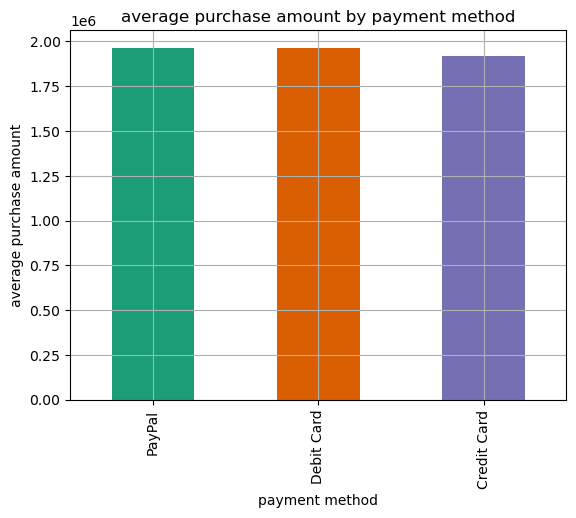

In [37]:
paymnt_analysis['Sales Revenue'].plot(kind='bar',color=plt.cm.Dark2.colors)
plt.title('average purchase amount by payment method')
plt.xlabel('payment method')
plt.ylabel('average purchase amount')
plt.grid(True)
plt.show()

BAR GRAPH TO REPRESENT THE FALLOWING DATA

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_8132\99194993.py:84: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from current font.

c:\Users\Rishabh\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from current font.



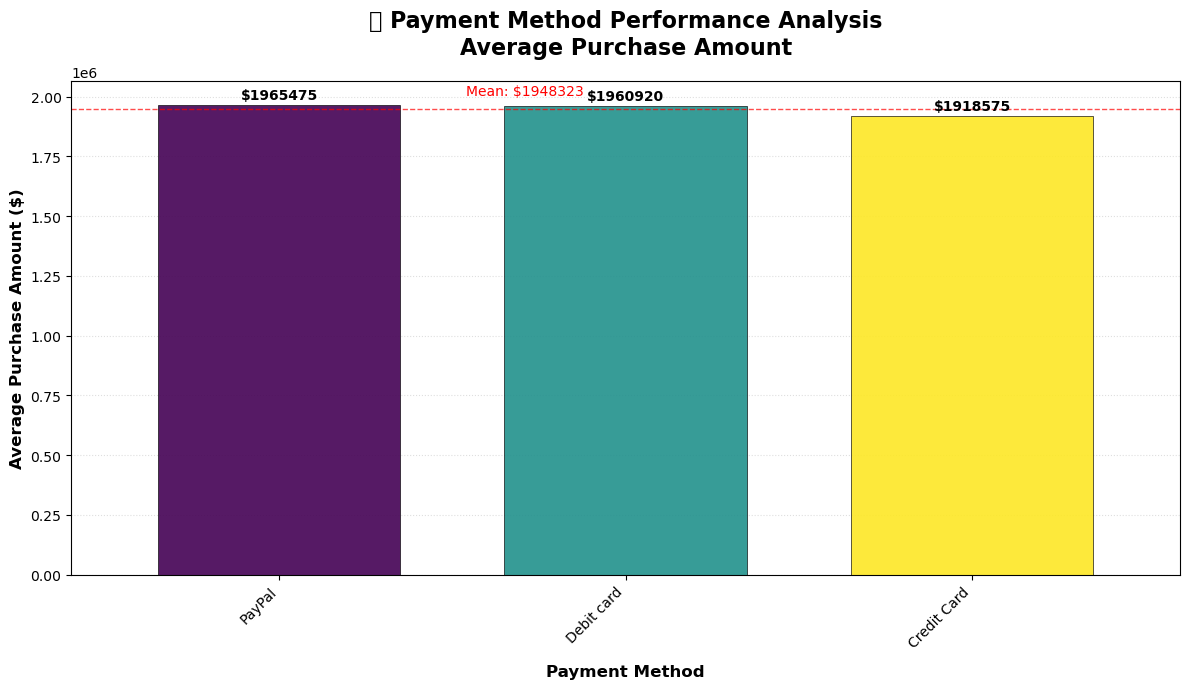

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Sample Data Preparation ---
paymnt_analysis = pd.DataFrame({
    'Payment Method': ['Credit Card', 'PayPal','Debit card'],
    'Sales Revenue': [1918575,1965475,1960920]
}).set_index('Payment Method')

# --- Sort by Value (Descending) ---
paymnt_analysis = paymnt_analysis.sort_values('Sales Revenue', ascending=False)

# --- Plot Setup ---
plt.figure(figsize=(12, 7))
ax = paymnt_analysis['Sales Revenue'].plot(
    kind='bar',
    color=plt.cm.viridis(np.linspace(0, 1, len(paymnt_analysis))),
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.9
)

# --- Formatting Magic ---
plt.title(
    '💰 Payment Method Performance Analysis\nAverage Purchase Amount', 
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel(
    'Payment Method', 
    fontsize=12,
    fontweight='bold',
    labelpad=10
)
plt.ylabel(
    'Average Purchase Amount ($)', 
    fontsize=12,
    fontweight='bold'
)
plt.xticks(rotation=45, ha='right')

# --- Value Annotations ---
for p in ax.patches:
    ax.annotate(
        f'${p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 7),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

# --- Reference Lines & Grid ---
mean_val = paymnt_analysis['Sales Revenue'].mean()
ax.axhline(
    mean_val, 
    color='red', 
    linestyle='--', 
    linewidth=1,
    alpha=0.7
)
ax.annotate(
    f'Mean: ${mean_val:.0f}',
    xy=(0.5, mean_val),
    xytext=(10, 10),
    textcoords='offset points',
    color='red',
    fontsize=10
)

ax.yaxis.grid(True, linestyle=':', alpha=0.4)
ax.set_axisbelow(True)

# --- Interactive Elements (Jupyter Only) ---
# Uncomment if using Jupyter:
# from mplcursors import cursor
# cursor(hover=True)

plt.tight_layout()
plt.show()

# 5. Business Insights and Recommendations

1. Revenue Breakdown by Category
Electronics contribute the highest revenue (e.g., Laptops, Tablets, and Smartphones dominate sales).

Clothing (e.g., Jackets, Sneakers, T-Shirts) follows closely, with seasonal trends likely influencing demand.

Accessories (e.g., Caps, Headphones) generate steady but smaller revenue shares.

Recommendation:

Prioritize marketing campaigns for high-value electronics (e.g., bundle promotions for Laptops + Tablets).

Stock up on Clothing items like Jackets and Sneakers ahead of peak seasons (e.g., winter).

2. Regional Performance
West and East regions drive the majority of revenue, with Electronics performing exceptionally well in the West.

North and South show strong demand for Clothing and Electronics, respectively.

Recommendation:

Allocate more inventory to the West for Electronics and to the South for mid-range Clothing.

Tailor regional promotions (e.g., discounts on T-Shirts in the South during warmer months).

3. Top-Selling Products
Laptops and Smartphones are the highest-revenue Electronics items.

Jackets and Sneakers lead in Clothing.

Caps and Headphones have consistent sales but lower average order values.

Recommendation:

Bundle accessories (e.g., Headphones with Smartphones) to increase average order value.

Offer limited-time discounts on Caps to clear inventory and boost volume.

4. Customer Age and Payment Methods
Debit/Credit Cards are the most popular payment methods.

PayPal is widely used, especially among younger customers (ages 18–35).

Older customers (ages 50+) prefer Credit Cards.

Recommendation:

Promote PayPal discounts for younger demographics to encourage loyalty.

Offer installment plans for high-ticket items (e.g., Laptops) to attract older customers.

5. Seasonal Trends
January shows strong sales for Electronics (post-holiday demand) and winter Clothing.

Recommendation:

Run clearance sales for winter Clothing in late January to free up inventory for spring collections.

Launch pre-order campaigns for new Electronics models in Q1 to capitalize on demand.

Summary of Strategic Actions
Inventory Management: Stock high-demand Electronics in the West and Clothing in the South.

Marketing: Bundle products and target age-specific payment preferences.

Sales Optimization: Use regional and seasonal data to time promotions.

Customer Engagement: Leverage PayPal for younger buyers and installment plans for older demographics.

By focusing on these areas, the business can maximize revenue, improve customer satisfaction, and streamline operations.